# Introduction to Dynamic Programming: Homework

## Problem 1: Cake-eating Problem

Start with the infinitely-lived cake-eating problem. The per-period utility function is $u(c) = ln(c)$ and the discount rate is $\beta=0.99$. The cake is of initial size $x_0 = 1$. The law of motion for the cake is $x' = x- c$.
1. What is the state variable of the problem?
1. Set up the Bellman Equation.
1. Solve for the value function and plot it.
1. Plot the consumption path.
1. Plot the consumption path for $\beta=0.9$ and $\beta=0.9999$. How and why are they different from your original solution?

Suppose the cake depreciates at rate $\delta$. That is the law of motion for each cake is $x' = (1-\delta)x - c$. 
1. Solve the problem and plot the consumption path with $\delta=0$ and $\delta=0.1$. Explain why these consumption paths are different.

Bonus: write your code using functions. \
Bonus bonus: write your code using an object.



## Answers: 

1. The state variable is the amount of cake remaining : $x$

2. The sequence problem (SP) is given by: 
$$
V^*(x_0) \equiv \max_{\{c_{t}\}_{t=0}^{\infty}} \sum_{t=0}^{\infty} \beta^t ln(c_t) \quad s.t. \quad x_{t+1} = x_t - c_t \quad \forall t \geq 0, \quad \text{given} \quad x_0 = 1
$$

The recursive formulation of the problem is given by: 
$$
V(x) = \sup_{c \in [0,x]} [ ln(c) + \beta V(x') ] \quad s.t. \quad x' = x - c
$$

Substituting the law of motion yields the Functional/Bellman Equation (FE): 
$$
V(x) = \sup_{c \in [0,x]} [ln(c) + \beta V(x-c)]
$$

Note that the flow utility is unbounded below (even if the domain is restricted to $(0,1]$)  With unbounded returns, solutions to the functional equation may have solutions other than the supremum function of (SP) $V^*$ (see S-L Section 4.4). We thus need to find a function $\hat{V}$ that is an upper bound for $V^*$, and use $\hat{V}$ as the initial value function for VFI. 

By the law of motion and with $c \geq 0$, 
\begin{align*}
& x_{t+1} \leq x_{t} \quad\Longrightarrow\quad ln(x_{t+1}) \leq ln(x_{t}) \quad\Longrightarrow\quad ln(x_{t}) \leq ln(x_0) \quad\forall t \geq 0 \\~\\
& \therefore ln(x_t-x_{t+1}) \leq ln(x_t) \leq ln(x_0) \quad \forall t \geq 0 \\~\\
& \therefore \sum_{t=0}^{\infty} \beta^t ln(x_t-x_{t+1}) \leq \frac{ln(x_0)}{1-\beta} \quad\forall \{ x_t \} \in \Pi(x_0) \quad\forall x_0 \\~\\
& \therefore V^*(x_0) \leq \frac{ln(x_0)}{1-\beta} \equiv \hat{V}(x_0) \quad\forall x_0
\end{align*}


3 & 4. Solve for value function. Plot the value function and consumption path: 

In [1]:
# Import packages and class
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from cakeEating import CakeEatingGS

Converged in 2233 iterations. Elapsed time is 1.74 seconds.


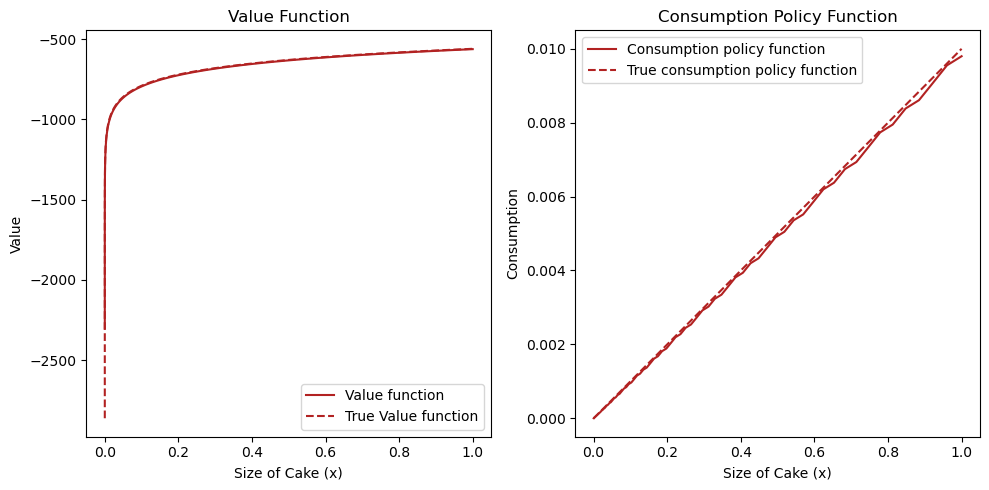

In [2]:
# Instantiate class with default parameters: 
'''
# Default structural parameters: 
beta = 0.99, # Discount factor
xmin = 1e-10, # Minimum value of asset grid
xmax = 1, # Maximum value of asset grid
v0 = None, # Initial guess of value
delta = 0, # Depcreciation rate

# Default simulation parameters: 
max_iter = 5000, 
tolerance = 1e-10, 
grid_size_x = 100, 
grid_size_c = 500: 
'''
ce = CakeEatingGS()

# Simulate model
ce.solve_model()
x = ce.x
v_gs = ce.v
c_gs = ce.c_policy
v_true = ce.v_true_delta0
c_true = ce.c_true_delta0

## Plots
plt.figure(figsize=(10, 5))

# Plot value function and consumption policy function
plt.subplot(1,2,1)
plt.plot(x, v_gs, label='Value function', color=(178/255,34/255,34/255), linestyle='-')
plt.plot(x, v_true, label='True Value function', color=(178/255,34/255,34/255), linestyle='--')
plt.xlabel('Size of Cake (x)')
plt.ylabel('Value')
plt.legend()
plt.title('Value Function')

plt.subplot(1,2,2)
plt.plot(x, c_gs, label='Consumption policy function', color=(178/255,34/255,34/255), linestyle='-')
plt.plot(x, c_true, label='True consumption policy function', color=(178/255,34/255,34/255), linestyle='--')
plt.xlabel('Size of Cake (x)')
plt.ylabel('Consumption')
plt.legend()
plt.title('Consumption Policy Function')

plt.tight_layout()
plt.show()



***

5. Plot the consumption path for $\beta=0.9$ and $\beta=0.9999$. How and why are they different from your original solution?

The higher the discount factor, the more weight the household puts in future consumption. Thus, for a given level of asset, household with higher discount factor decides to consume less today to allocate more consumption in the future. 

beta = 0.9
Converged in 215 iterations. Elapsed time is 0.34 seconds.
------------
beta = 0.99
Converged in 2233 iterations. Elapsed time is 1.93 seconds.
------------
beta = 0.9999
Converged in 204011 iterations. Elapsed time is 153.73 seconds.
------------


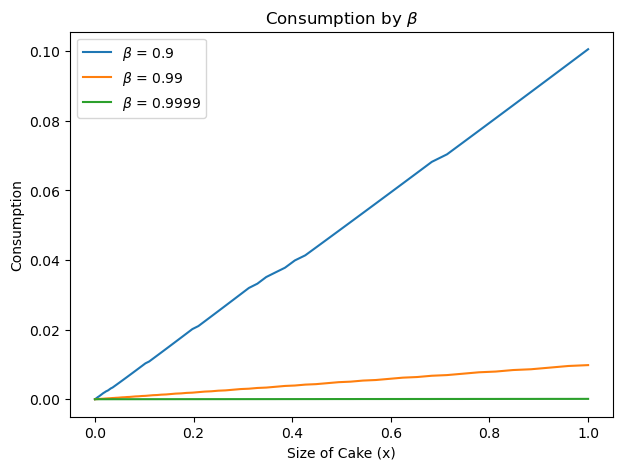

In [3]:
# Initialize dictionaries to store results
x_vec = {}
v_vec = {}
c_gs_vec = {}
v_true_vec = {}
c_true_vec = {}
beta_vec = [0.9, 0.99, 0.9999]

for i, b in enumerate(beta_vec, start=1):

    # Initialize the model with beta = b
    ce = CakeEatingGS(beta=b, grid_size_c=500, grid_size_x=100, max_iter=1000000)
    
    print(f'beta = {b}')
    # Simulate the model
    ce.solve_model()
    print(f'------------')

    # Store the results in the respective dictionaries
    x_vec[f"x_{i}"] = ce.x
    v_vec[f"v_{i}"] = ce.v
    c_gs_vec[f"c_gs_{i}"] = ce.c_policy
    v_true_vec[f"v_true_{i}"] = ce.v_true_delta0
    c_true_vec[f"c_true_{i}"] = ce.c_true_delta0


## Plots
plt.figure(figsize=(7, 5))

# Plot consumption path
for i, beta in enumerate(beta_vec, start=1):
    plt.plot(x_vec[f"x_{i}"], c_gs_vec[f"c_gs_{i}"], label=f'$\\beta$ = {beta}')
plt.xlabel('Size of Cake (x)')
plt.ylabel('Consumption')
plt.legend()
plt.title(f'Consumption by $\\beta$')
plt.legend()
plt.show()

***

Suppose the cake depreciates at rate $\delta$. That is the law of motion for each cake is $x' = (1-\delta)x - c$. 
1. Solve the problem and plot the consumption path with $\delta=0$ and $\delta=0.1$. Explain why these consumption paths are different.

Depreciation of cake reduces the resources available to the household at subsequent periods. This decreases the marginal benefit of saving a unit of consumption today for future consumption. Therefore, the household decides to reduce saving and consume more today. 

delta = 0
Converged in 2262 iterations. Elapsed time is 5.95 seconds.
-----------
delta = 0.1
Converged in 2068 iterations. Elapsed time is 4.74 seconds.
-----------


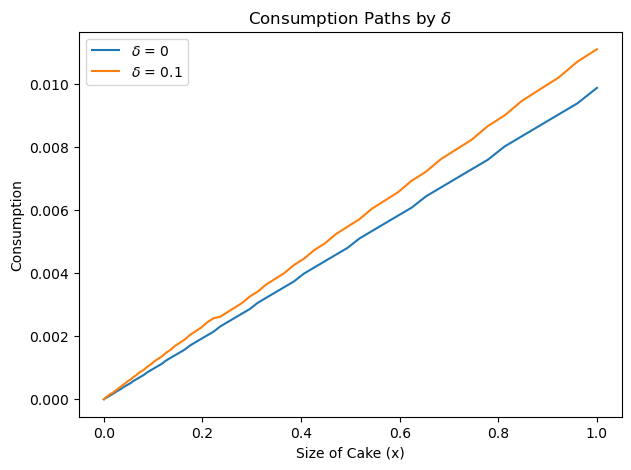

In [4]:
# delta = 0
print(f'delta = 0')
ce = CakeEatingGS(grid_size_c=1000)
ce.solve_model()
c = ce.c_policy
x = ce.x
print(f'-----------')

# delta = 0.1
print(f'delta = 0.1')
ce_deprec = CakeEatingGS(delta=0.1, grid_size_c=1000)
ce_deprec.solve_model()
c_deprec = ce_deprec.c_policy
print(f'-----------')

## Plots
plt.figure(figsize=(7, 5))
plt.plot(x, c, label=f'$\\delta$ = 0')
plt.plot(x, c_deprec, label=f'$\\delta$ = 0.1')
plt.xlabel('Size of Cake (x)')
plt.ylabel('Consumption')
plt.legend()
plt.title(f'Consumption Paths by $\\delta$')
plt.legend()
plt.show()

***

## Problem 2: Finite-horizon Cake-eating Problem

The household lives for $T$ periods. The per-period utility function is $u(c) = ln(c)$ and the discount rate is $\beta=0.99$. The cake is of initial size $x_0 = 1$. The law of motion for the cake is $x' = x- c$.
1. What is the state variable of the problem?
1. Set up the Bellman Equation.
1. What does the Bellman Equation look like in period $T$?
1. Let $T=50$ and solve backwards. Then solve for $T=500$.
1. Plot the two consumption paths and compare them to your answer in problem 1. How are they different and why?

Bonus: write your code using functions. \
Bonus bonus: write your code using an object.


## Answers: 

1. The state variable is the amount of cake remaining and the number of periods remaining until T: ($x$, $n$)

2. The sequence problem (SP) of the finite-horizon cake-eating problem is given by: 
$$
V(x_0) \equiv \max_{\{c_{t}\}_{t=0}^{T-1}} \sum_{t=0}^{T-1} \beta^t ln(c_t) \quad s.t. \quad x_{t+1} = x_t - c_t \quad \forall 0 \leq t \leq T-1, \quad \text{given} \quad x_0 = 1
$$

Denoting n as the number of periods remaining until T, the Bellman Equation can be formulated as: 
$$
V(x,n) \equiv 0 \quad \text{if} \quad n = 0 \\
V(x,n) \equiv \sup_{c \in [0,x]} [ln(c) + \beta V(x-c,n-1)] \quad\forall n\leq1
$$

3. At period T-1, the household eats all the remaining cake and saves none for T, as she gains no utility from consumption at T. For consistency, we define the Bellman equation at period T to be defined as V(x,0) = 0. 

4 & 5. Let T=50 and solve backwards. Then solve for T=500. Plot the two consumption paths and compare them to your answer in problem 1. How are they different and why?

Note that without writing a new code, we can solve this specific finite-horizon problem by using the cakeEating class used in the infinite-horizon problem. First, consider "max_simul" in the cakeEating class as the time horizon $T$. The iterations, starting from 0 to "max_simul - 1", represent the number of periods remaining until $T-1$. In other words, at iteration = $0$, we have $t=T-1$ and at iteration = $T-1$, we have $t=0$. Second, set the initial value function $v0=0$, which represents the value at $t=T$. At iteration = $0$ ($t=T-1$), the continuation value (the value at time horizon $T$) is zero. Therefore, iterating this process until "max_simul" (not until convergence) is essentially solving the finite-horizon problem backwards. To track the consumption path over time, we just need to save the consumption policy function for each iteration. Here, I just track the consumption at $t=0$ to compare with problem 1. 

Converged in 2262 iterations. Elapsed time is 4.37 seconds.


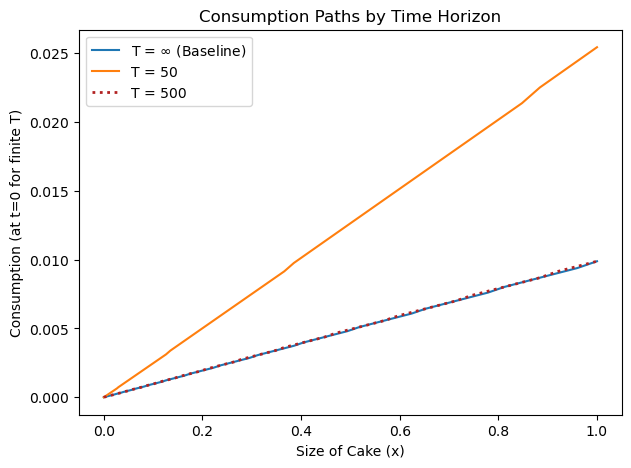

In [5]:
# Baseline (Infinite-horizon)
ce = CakeEatingGS(grid_size_c=1000)
ce.solve_model()
x = ce.x
c_IH = ce.c_policy

# Finite-horizon T=50 (Note: tolerance must be small enough to prevent converengence before all iterations)
ceFH_T50 = CakeEatingGS(max_iter=50, v0=0, grid_size_c=1000) 
ceFH_T50.solve_model()
c_T50 = ceFH_T50.c_policy # Policy at t=0
x = ceFH_T50.x

# Finite-horizon T=500 (Note: tolerance must be small enough to prevent converengence before all iterations)
ceFH_T500 = CakeEatingGS(max_iter=500, v0=0, grid_size_c=1000) 
ceFH_T500.solve_model()
c_T500 = ceFH_T500.c_policy # Policy at t=0

## Plots
plt.figure(figsize=(7, 5))
plt.plot(x, c_IH, label=f'T = $\\infty$ (Baseline)')
plt.plot(x, c_T50, label=f'T = 50')
plt.plot(x, c_T500, label=f'T = 500', linestyle=':', linewidth=2, color=(178/255,34/255,34/255))
plt.xlabel('Size of Cake (x)')
plt.ylabel('Consumption (at t=0 for finite T)')
plt.legend()
plt.title(f'Consumption Paths by Time Horizon')
plt.legend()
plt.show()


The consumption policy function under finite horizon converges to that under infinite horizon as the time horizon increases. The longer the time horizon, the household needs to allocate the cake more to future consumption. Hence, for a given cake size, consumption is lower for longer time horizon. 

***
## Problem 3: FOC from Bellman

1. Derive the FOC for the consumption-savings problem in lecture.
1. How is the FOC related to the Euler Equation?
1. Compute optimal consumption using that FOC and compare it to the consumption path we got in class.
1. Explain why they are different. Which one would you prefer?

Bonus: write your code using functions. \
Bonus bonus: write your code using an object.

## Answers: 

The Bellman Equation of the consmption-savings problem is given by: 
$$
V(a) = \sup_{c(a) \in [0, (1+r)a + y ]} [ u(c(a)) + \beta V(((1+r)a + y - c(a)))]
$$

1. FOC w.r.t $c(a)$ yields: 
$$
\frac{\partial u(c(a))}{\partial c(a)} = \beta \frac{\partial V((1+r)a + y - c(a))}{\partial a'(a)}
$$
The FOC condition implies that the marginal utility of consumption today is equal to the discounted marginal valuation obtained from saving today's consumption. 

2. By the Envelope Theorem, we have $\frac{\partial V(a')}{\partial a'} = (1+r) \frac{\partial u(c')}{\partial c'}$, where $c' = c(a'(a)) = c((1+r)a + y - c(a))$, leading to the Euler Equation as below : 
$$
\frac{\partial u(c(a))}{\partial c(a)} = \beta (1+r) \frac{\partial u(c((1+r)a + y - c(a)))}{\partial c'}
$$
Under log utility, we have: 
$$
\begin{align*}
& \frac{1}{c(a)} = \beta (1+r) \frac{1}{c((1+r)a + y - c(a))}
\end{align*}
$$

3. Compute optimal consumption using that FOC and compare it to the consumption path we got in class.

In 3.2., we use the following equations to compute optimal consumption: 
$$
\begin{align}
c = \frac{c'}{\beta (1+r)} \\~\notag\\
a = \frac{a'+c-y}{1+r} 
\end{align}
$$

3.1. Consumption path we got in class

In [6]:
## VFI Grid Search Method

# Simulation parameters
max_iter = 2000
tolerance = 1e-5
iteration = 0

# Structural parameters
beta = 0.99
r = (1/beta) - 1
y = 1
amin = 0
amax = 1
grid_size = 100

# Define asset grid
a = np.linspace(amin, amax, grid_size)

# Initial guess for the value function
v0 = np.linspace(1, 10, grid_size)

# Define utility function --- makes it easy to change later
def utility(c):
    return np.log(c)

# consumption and a' grid
c_candidates = y + np.linspace(-0.5, 0.5, 500)
a_prime_candidates = (1+r)*a[np.newaxis, :] + y - c_candidates[:, np.newaxis] 


# Simulation
v_old = v0 
for iteration in range(max_iter):

    f_interp = interp1d(a, v_old, kind='linear', bounds_error=False, fill_value=(-10000, 0))
    v_prime_candidates = f_interp(a_prime_candidates)

    # Calculate utility for all possible consumption choices
    utility_values = utility(c_candidates[:, np.newaxis]) + beta * v_prime_candidates

    # Find the consumption choice that maximizes utility
    c_index = np.argmax(utility_values, axis=0) 
    c = c_candidates[c_index]
    v_new = np.max(utility_values, axis=0)

    # Check convergence
    if np.max(np.abs(v_old-v_new))<tolerance:
        print('Converged in',iteration, 'iterations')
        break
    
    v_old = v_new

else: 
    print('Model did not converge')

c_vfi = c


Converged in 906 iterations


3.2. Consumption path using Euler Equation

In [7]:
## Method using Euler Equation

# Simulation parameters
max_iter = 10000
tolerance = 1e-5
iteration = 0

# Structural parameters
beta = 0.99
r = (1/beta) - 1
y = 1
amin = 1e-10
amax = 1
grid_size = 100

# Define tomorrow's asset grid
aprime_grid = np.linspace(amin, amax, grid_size)

# Intial guess for tomorrow's consumption
cprime0 = y + np.linspace(-0.5, 0.5, grid_size)

# Simulation
cprime = cprime0 
for iteration in range(max_iter):

    # Today's consumption
    c = cprime / (beta*(1+r))

    # Today's asset
    a = (aprime_grid + c - y)/(1+r)

    # Interpolate : bound consumption within feasible set
    f_interp = interp1d(a, c, kind='linear', bounds_error=False, fill_value='extrapolate')
    cprime_new = f_interp(aprime_grid)

    # Check convergence
    if np.max(np.abs(cprime-cprime_new))<tolerance:
        print('Converged in',iteration, 'iterations')
        break

    cprime = cprime_new

else:
    print('Model did not converge')

c_foc = cprime_new


Converged in 192 iterations


4. Explain why they are different. Which one would you prefer? 

Given the same level of tolerance, solving the consumption-savings problem using the Euler Equation is more accurate compared to VFI. This is mainly because the former method does not need to search for the maximizers as the optimal behavior of the household is already specified. The former method is thus preferred. 

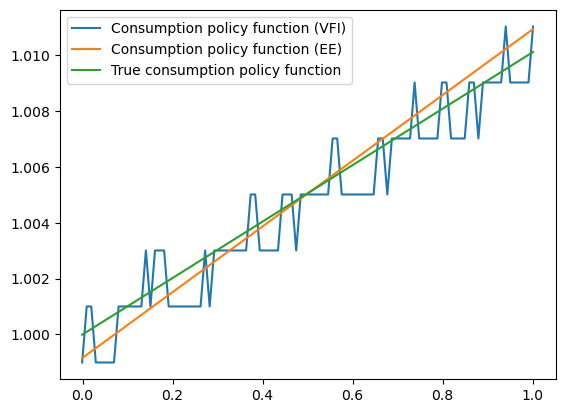

Error of VFI is 9.825150905478653e-05
Error of EE-method is 2.3400401978034646e-05


In [8]:
# Compare computed policy functions with true value
plt.plot(a, c_vfi, label='Consumption policy function (VFI)')
plt.plot(a, c_foc, label='Consumption policy function (EE)')
plt.plot(a, y + r * a, label='True consumption policy function')
plt.legend()
plt.show()

# Calculate error
print(f'Error of VFI is {sum((y + r * a - c_vfi)**2)}')
print(f'Error of EE-method is {sum((y + r * a - c_foc)**2)}')